In [183]:
from matplotlib.pyplot import yticks
from numpy.array_api import square

from Server_Cleaning.modules.Assignment_datasets import *
from Assignment_Queries.pandas_lib.func_lib import *
path = "./"

C:\Users\marko\AppData\Local\Temp\ipykernel_248\2619186235.py:2: UserWarning: The numpy.array_api submodule is still experimental. See NEP 47.
  from numpy.array_api import square


In [184]:
game_events_csv = pd.read_csv("./Assignment_Data_2023-2024/game_events.csv")
player_val_clean = clean_player_valuations(get_player_valuations(path))
players_clean = clean_players(get_players(path))
players_clean

C:\Users\marko\PycharmProjects\ium_dataset_processor\Server_Cleaning\modules\Assignment_datasets.py:287: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  players[['height_in_cm', 'market_value_in_eur', 'highest_market_value_in_eur']].fillna(-1))


,player_id,last_name,player_name,last_season,current_club_id,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,value_eur,top_value_eur,contract_expiration_date,agent_name,image_url
0,598,Hildebrand,Timo Hildebrand,2014,24,Germany,Worms,Germany,1979-04-05,Goalkeeper,Goalkeeper,<NA>,-1,-1,10000000,NaT,<NA>,https://img.a.transfermarkt.technology/portrai...
1,670,Petrov,Martin Petrov,2012,714,Bulgaria,Vratsa,Bulgaria,1979-01-15,Left Winger,Attack,<NA>,-1,-1,12000000,NaT,IFM,https://img.a.transfermarkt.technology/portrai...
2,1323,Amedick,Martin Amedick,2012,24,Germany,Paderborn,Germany,1982-09-06,Centre-Back,Defender,<NA>,-1,-1,2750000,NaT,<NA>,https://img.a.transfermarkt.technology/portrai...
3,3195,Pennant,Jermaine Pennant,2013,512,England,Nottingham,England,1983-01-15,Right Winger,Attack,right,173,-1,10500000,NaT,Andrew Sky,https://img.a.transfermarkt.technology/portrai...
4,3259,Duff,Damien Duff,2013,931,Ireland,Ballyboden,Ireland,1979-03-02,Right Midfield,Midfield,left,177,-1,17000000,NaT,<NA>,https://img.a.transfermarkt.technology/portrai...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30297,371851,Bijol,Jaka Bijol,2023,410,Slovenia,Vuzenica,Slovenia,1999-02-05,Centre-Back,Defender,right,190,10000000,10000000,2027-06-30,MSC GROUP,https://img.a.transfermarkt.technology/portrai...
30298,537171,Pizzignacco,Semuel Pizzignacco,2018,410,Italy,Monfalcone,Italy,2001-09-01,Goalkeeper,Goalkeeper,right,188,325000,350000,2025-06-30,<NA>,https://img.a.transfermarkt.technology/portrai...
30299,586756,Ebosele,Festy Ebosele,2023,410,Ireland,"Enniscorthy, Wexford",Ireland,2002-08-02,Right Midfield,Midfield,right,180,4500000,4500000,2027-06-30,The Kulture Group,https://img.a.transfermarkt.technology/portrai...
30300,704692,Cocetta,Nicolò Cocetta,2022,410,Italy,San Daniele del Friuli,Italy,2003-12-19,Centre-Back,Defender,<NA>,-1,75000,75000,2023-06-30,<NA>,https://img.a.transfermarkt.technology/portrai...


In [185]:
players_names = players_clean.drop(columns=['last_name',  'last_season',
       'current_club_id', 'country_of_birth', 'city_of_birth',
       'country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
       'foot', 'height_in_cm', 'value_eur', 'top_value_eur',
       'contract_expiration_date', 'agent_name', 'image_url'])

player_val_2022 = player_val_clean.drop(columns=['date', 'date_week',
       'current_club_id', 'current_dom_competition_code'])[player_val_clean['last_season'] > 2021]
player_val_2022 = player_val_2022.loc[player_val_2022['player_id'].isin(players_names['player_id'])]
top_payed_players = player_val_2022.drop_duplicates('player_id', keep='last').sort_values(by='market_value_eur', ascending=False).head(100)
top_payed_players

,player_id,last_season,market_value_eur
439318,342229,2023,180000000
436380,418560,2023,180000000
433681,371998,2023,150000000
436396,433177,2023,120000000
434963,401923,2023,120000000
...,...,...,...
436436,485706,2023,45000000
433435,108390,2023,45000000
436403,444523,2023,45000000
437326,281963,2023,45000000


In [186]:
top_payed_players_names = players_names.query('player_id.isin(@top_payed_players.player_id)', engine='python')
top_payed_players_names

,player_id,player_name
596,192565,Leroy Sané
1060,411295,Raphinha
1080,424204,Alphonso Davies
1107,444523,Lucas Paquetá
1184,503482,Min-jae Kim
...,...,...
29101,683840,Pedri
29665,355915,Cristian Romero
29666,378710,Richarlison
29959,401923,Victor Osimhen


In [187]:
game_events = game_events_csv[game_events_csv['type'] != "Shootout"].copy()
game_events['date'] = game_events['date'].astype('datetime64[ns]')
game_events = game_events[game_events['date'] > pd.to_datetime("2021-12-31")]
top_payed_game_events = game_events[game_events['player_id'].isin(top_payed_players_names['player_id'])].drop(columns=['game_id','game_event_id','date', 'type', 'club_id', 'player_in_id', 'player_assist_id']).dropna()
top_payed_game_events

,minute,player_id,description
494470,58,344381,", Left-footed shot, 8. Goal of the Season"
494471,47,451276,", Right-footed shot, 4. Goal of the Season"
494483,87,581678,", Header, 3. Goal of the Season"
494562,45,418560,", Left-footed shot, 14. Goal of the Season"
494563,75,418560,", Left-footed shot, 15. Goal of the Season"
...,...,...,...
666035,81,434675,", Tactical"
666036,76,451276,", Tactical"
666037,70,546543,", Right-footed shot, 1. Tournament Goal Assist..."
666054,53,485706,", Right-footed shot, 1. Tournament Goal Assist..."


In [188]:
#sostituire player_id con il nome dei player
top_payed_game_events = pd.merge(top_payed_game_events, players_names, on='player_id', how='left').drop(columns=['player_id'])
top_payed_game_events

,minute,description,player_name
0,58,", Left-footed shot, 8. Goal of the Season",Christopher Nkunku
1,47,", Right-footed shot, 4. Goal of the Season",Dominik Szoboszlai
2,87,", Header, 3. Goal of the Season",Jude Bellingham
3,45,", Left-footed shot, 14. Goal of the Season",Erling Haaland
4,75,", Left-footed shot, 15. Goal of the Season",Erling Haaland
...,...,...,...
2488,81,", Tactical",Cody Gakpo
2489,76,", Tactical",Dominik Szoboszlai
2490,70,", Right-footed shot, 1. Tournament Goal Assist...",Darwin Núñez
2491,53,", Right-footed shot, 1. Tournament Goal Assist...",Amadou Onana


In [189]:
# creating minute range!!!
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]  # 90 is for the goals occurred after the 90th minute
bins_by_ten = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]  # 90 is for the goals occurred after the 90th minute
top_payed_game_events.loc[:, 'minute_range'] = pd.cut(top_payed_game_events['minute'], bins=bins_by_ten)
top_payed_game_events = top_payed_game_events.drop(columns=['minute'])
top_payed_game_events.head()

,description,player_name,minute_range
0,", Left-footed shot, 8. Goal of the Season",Christopher Nkunku,"(50, 60]"
1,", Right-footed shot, 4. Goal of the Season",Dominik Szoboszlai,"(40, 50]"
2,", Header, 3. Goal of the Season",Jude Bellingham,"(80, 90]"
3,", Left-footed shot, 14. Goal of the Season",Erling Haaland,"(40, 50]"
4,", Left-footed shot, 15. Goal of the Season",Erling Haaland,"(70, 80]"


In [190]:
def event_description_modifier(x):
    """
    Used in apply to modify the description column to cleaning the text inside
    """
    if 'red' in x or 'Red' in x:
        return 'Red Card'
    elif 'yellow' in x or 'Yellow' in x:
        return 'Yellow Card'
    elif 'goal' in x or 'Goal' in x:
        return 'Goal'
    else:
        return 'Substitution'

In [191]:
top_payed_game_events['description'] = top_payed_game_events['description'].apply(lambda x : event_description_modifier(x))
dropdown = widgets.Dropdown(
    options=top_payed_game_events.index.unique()
)

In [192]:
def update_plot(name):
    # Group by 'minute_range' and 'description' to get counts
    df = top_payed_game_events.loc[top_payed_game_events['player_name'] == name].drop(columns=['player_name'])
    description_counts = df.groupby(['minute_range', 'description']).size().unstack(fill_value=0)
    df = df.drop(columns=['description'])
    df = df.merge(description_counts, on='minute_range', how='left').drop_duplicates('minute_range').set_index('minute_range').sort_index()
    # Create a bar plot using Seaborn
    plt.figure(figsize=(12, 6))
    ax = sns.heatmap(df.T, cmap='coolwarm', linewidths=1, linecolor='white', annot=True)
    # Set labels and title
    
    # Rotate the y-axis labels by 90 degrees
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right')  # ha='right' aligns labels to the right

    # Rotate the x-axis labels if needed (can adjust rotation angle as per need)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels to 45 degrees for better readability
    plt.xlabel('Minute Range')
    plt.ylabel('Game Events')
    plt.title(f'Game Events Occurrences during Minute Ranges for {name}')
    plt.show(ax)
    

C:\Users\marko\AppData\Local\Temp\ipykernel_248\726665331.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  description_counts = df.groupby(['minute_range', 'description']).size().unstack(fill_value=0)


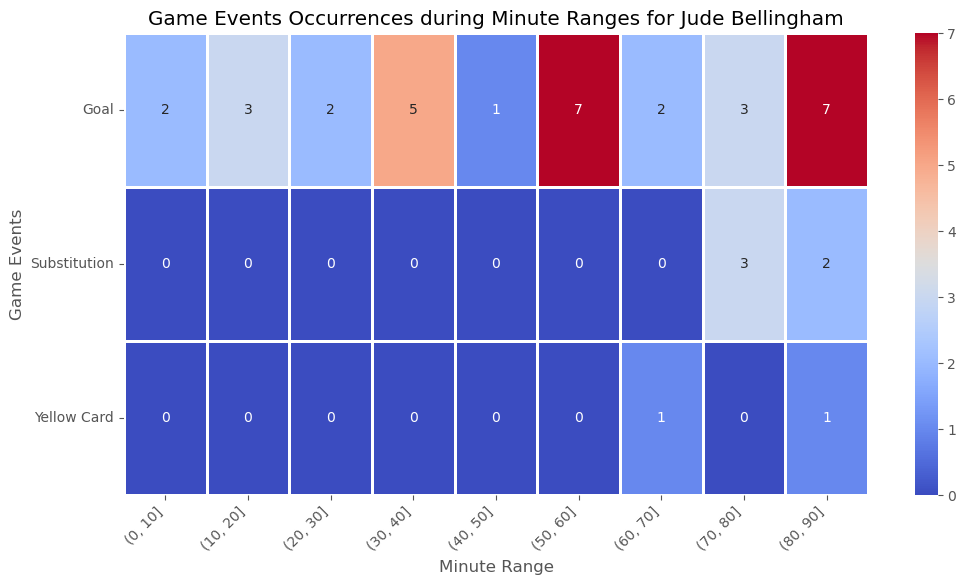

In [193]:
#widgets.interact(update_plot, name=dropdown)
update_plot('Jude Bellingham')